## Syed Sajjad Askai

### 2139484

## Lab Program 1(Section -1 and Section -2)


# Simple Neural Network Implementation


### Contents
* Simple Neural Network
* Activation Function

## Problem 1 

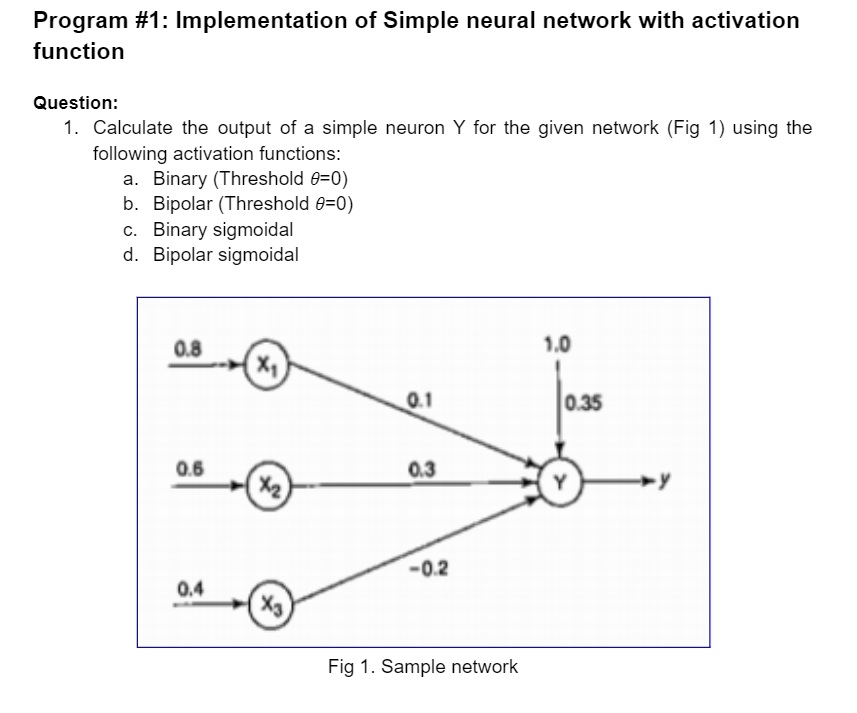

In [2]:
import os
import matplotlib.pyplot as plt
##to save the file 
import joblib
import numpy as np
import pandas as pd
import math

plt.style.use("fivethirtyeight")


ModuleNotFoundError: No module named 'joblib'

## Activation Functions


### Linear

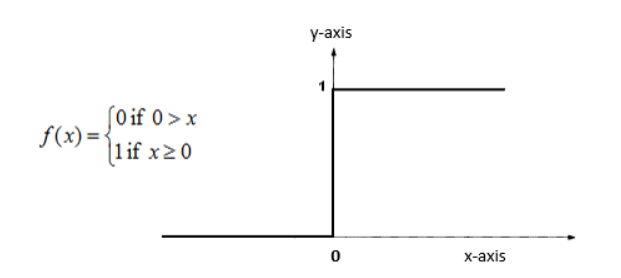

### Bipolar Step Function


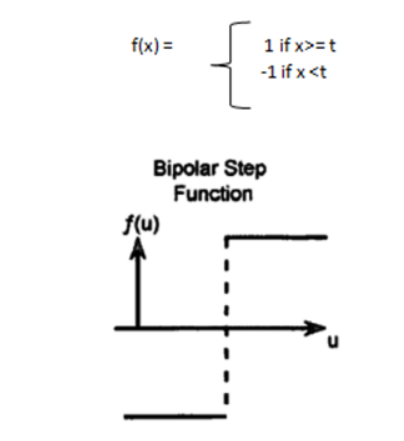

### Binary Sigmoid Function


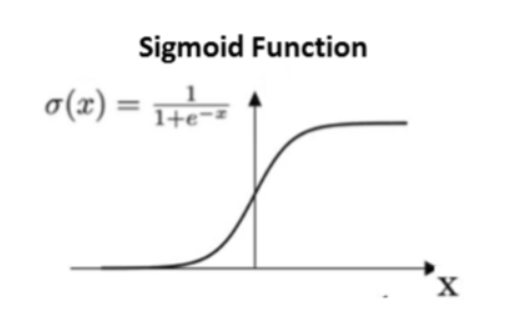

In [3]:
class ActivationFunctions:
    def __init__(self):
        pass
    @classmethod
    def binary(self, y, theta):
        if y >= theta:
            return 1
        return 0

    def bipolar_step(self, y, theta):
        if y >= theta:
            return 1
        return -1

    def binary_sigmoidal(self, y):

        return 1/(1+ math.exp(-y))

    def bipolar_sigmoid(self, y):
        return math.tanh(y)

    def signum(self, y):
        if y<0:
            return -1
        elif y>0:
            return 1
        return 0

In [4]:
def Perceptron(x,activation, theta=0):
    x_inputs = np.array(x)
    print("Feature Values (X(i))--->",x_inputs)
    weights = []
    for i in range(0,x_inputs.size):
        weights.append(np.random.uniform(0,1))
    print("Weight Values (w(i))--->", weights)
    bias = 1*0.35
    print("Bias--->", bias)
    yin = np.dot(x_inputs,weights) + bias
    print("Y(in) = X1*w1 + X2*w2 + X3*w3 + b--->", yin)
    print("Current Theta Threshold--->", theta)
    activation_func = {
        "binary": ActivationFunctions().binary(yin,theta),
        "bipolar_step": ActivationFunctions().bipolar_step(yin,theta),
        "binary_sigmoidal": ActivationFunctions().binary_sigmoidal(yin),
        "bipolar_sigmoid": ActivationFunctions().bipolar_sigmoid(yin)
    }
    print("Final Perceptron Output--->",activation_func[activation])
    
    return activation_func[activation]


In [4]:
print("Binary Activation Function Output:\n")
Perceptron([0.2,0.3,0.4],"binary", theta=0)

Binary Activation Function Output:

Feature Values (X(i))---> [0.2 0.3 0.4]
Weight Values (w(i))---> [0.4105583627457361, 0.12512061192429602, 0.5498036097953254]
Bias---> 0.35
Y(in) = X1*w1 + X2*w2 + X3*w3 + b---> 0.6895693000445662
Current Theta Threshold---> 0
Final Perceptron Output---> 1


1

## Problem 2

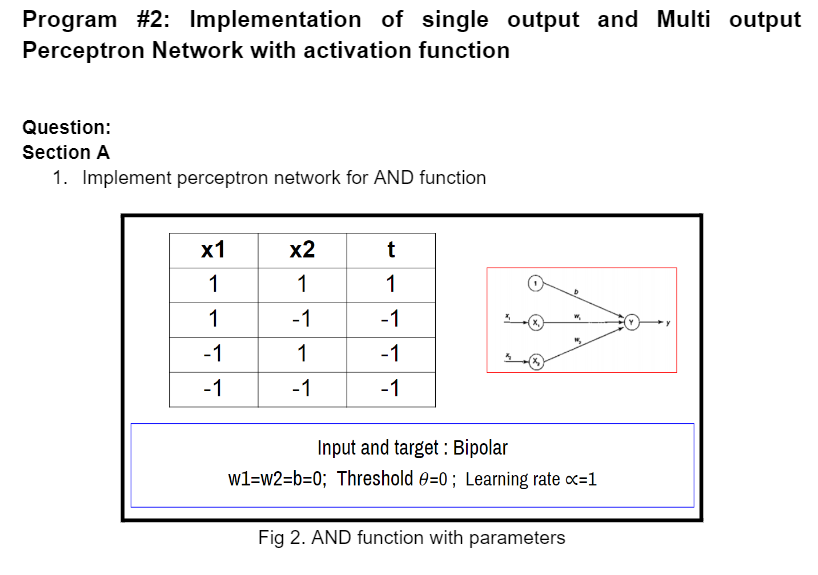

In [5]:
class Perceptron:
    def __init__(self, Learing_rate: float=None, epochs: int = None):
        ## to keep the weight smalll #here 1e-4 is 10 to the power of 4  i.e 0.00001
        self.weights = np.random.randn(3) * 1e-4
        ##Learing rate
        self.Learing_rate = Learing_rate
        ##iteration
        self.epochs = epochs
        
    ## Fardward pass
    ##Matrix Multiplication
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    ## define Activation Function() 
    ##Linear Activation
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
        
    ## X and Y is dependent and independent variable
    def fit(self, X, y):
        self.X = X
        self.y = y

        #initializing the value of the bais
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n {X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch + 1}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.Learing_rate * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print(f"##"*10)
    
            
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    

## Perceptron

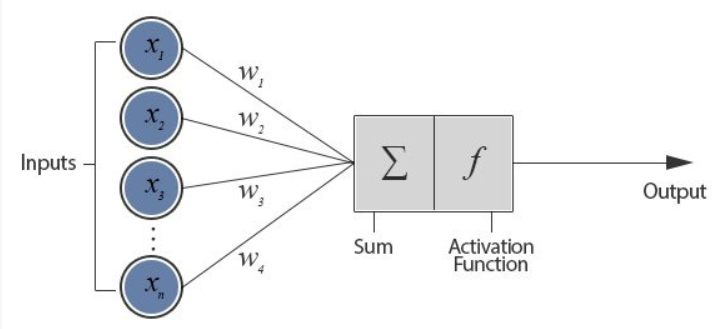

In [7]:
import pandas as pd
AND = {
    "x1" : [1,1,-1,-1],
    "x2" : [1,-1,1,-1],
    "y" : [1,-1,-1,-1]
}

df_And = pd.DataFrame(AND)

In [121]:
## Prepare the data
def prepare_data(df, target_col="y"):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    return X, y

In [122]:
X, y = prepare_data(df_And)
X

,x1,x2
0,1,1
1,1,-1
2,-1,1
3,-1,-1


In [125]:
ETA = 1
EPOCHS = 10
model_And = Perceptron(eta= ETA, epochs = EPOCHS)

model_And.fit(X, y)


X with bias: 
 [[ 1.  1. -1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]
 [-1. -1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 0 0]
error: 
0    0
1   -2
2   -1
3   -1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[1.08846889e-04 1.99993093e+00 3.99997913e+00]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    1
1   -1
2   -1
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[2.00010885 3.99993093 5.99997913]
####################
--------------------
for epoch >> 3
--------------------
predicted value after forward pass: 
[1 0 0 0]
error: 
0    0
1   -1
2   -1
3   -1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[3.00010885 4.99993093 8.99997913]
####################
--------------------
for epoch >> 4
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    1
1   -1
2   -1
3   -1
Name: y, d

In [126]:
model_And.predict(X)

array([1, 0, 0, 0])

### Implement of XOR GAte

In [97]:
XOR_Gate = {
    "x1" :[0,0,1,1],
    "x2" : [0,1,0,1],
    "y" : [0,1,1,0]
}
df_And = pd.DataFrame(XOR_Gate)

In [98]:
X, y = prepare_data(df_And)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [99]:
ETA = 1
EPOCHS = 5
model_And = Perceptron(eta= ETA, epochs = EPOCHS)

model_And.fit(X, y)

X with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/5: 
[ 1.00000131  0.99979073 -1.99981282]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/5: 
[ 1.31239428e-06 -2.09269154e-04  1.87179734e-04]
####################
--------------------
for epoch >> 3
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/5: 
[ 1.00000131  0.99979073 -1.99981282]
####################
--------------------
for epoch >> 4
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name

## Problem 2

In [116]:
import seaborn as sns

In [171]:
iris = sns.load_dataset("iris")

In [172]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [173]:
iris.shape

(150, 5)

In [174]:
##Display the data
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [175]:
## Coverting into into int
iris = pd.get_dummies(iris,prefix_sep="_target_")
iris

,sepal_length,sepal_width,petal_length,petal_width,species_target_setosa,species_target_versicolor,species_target_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [176]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_target_setosa,species_target_versicolor,species_target_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


,x1,x2
0,1,1
1,1,-1
2,-1,1
3,-1,-1


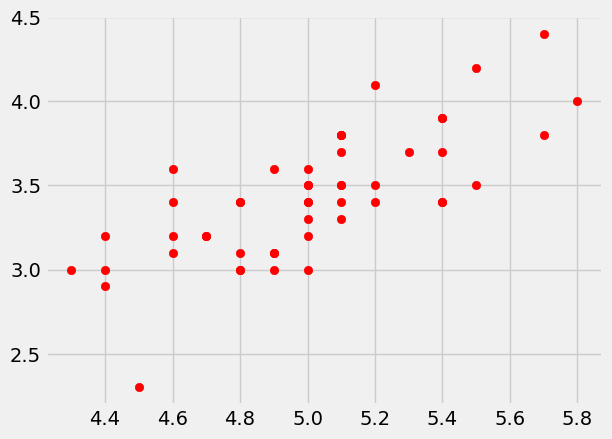

In [109]:
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')


In [110]:
from sklearn.model_selection import train_test_split


# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,
                                                    random_state=0)


In [112]:
ETA = 1
EPOCHS = 5
model = Perceptron(eta= ETA, epochs = EPOCHS)

model.fit(x_train, y_train)


X with bias: 
 [[ 5.   2.  -1. ]
 [ 5.5  2.4 -1. ]
 [ 5.5  2.6 -1. ]
 [ 6.2  2.2 -1. ]
 [ 6.4  3.2 -1. ]
 [ 5.2  3.5 -1. ]
 [ 5.7  3.8 -1. ]
 [ 6.3  3.3 -1. ]
 [ 6.1  2.9 -1. ]
 [ 6.4  2.9 -1. ]
 [ 4.9  3.  -1. ]
 [ 5.9  3.  -1. ]
 [ 4.4  3.2 -1. ]
 [ 4.5  2.3 -1. ]
 [ 5.   3.6 -1. ]
 [ 5.7  4.4 -1. ]
 [ 5.1  3.5 -1. ]
 [ 5.   3.5 -1. ]
 [ 4.4  3.  -1. ]
 [ 5.4  3.9 -1. ]
 [ 6.1  3.  -1. ]
 [ 5.2  2.7 -1. ]
 [ 5.1  3.5 -1. ]
 [ 4.9  3.1 -1. ]
 [ 5.2  3.4 -1. ]
 [ 7.   3.2 -1. ]
 [ 4.8  3.4 -1. ]
 [ 5.   3.2 -1. ]
 [ 5.1  3.3 -1. ]
 [ 6.9  3.1 -1. ]
 [ 5.4  3.7 -1. ]
 [ 5.4  3.4 -1. ]
 [ 5.6  3.  -1. ]
 [ 4.9  2.4 -1. ]
 [ 5.7  2.6 -1. ]
 [ 6.   3.4 -1. ]
 [ 5.2  4.1 -1. ]
 [ 5.4  3.  -1. ]
 [ 5.8  4.  -1. ]
 [ 5.5  2.5 -1. ]
 [ 5.1  3.8 -1. ]
 [ 4.7  3.2 -1. ]
 [ 5.   3.3 -1. ]
 [ 6.2  2.9 -1. ]
 [ 5.1  2.5 -1. ]
 [ 5.6  2.5 -1. ]
 [ 5.4  3.4 -1. ]
 [ 5.6  2.7 -1. ]
 [ 6.3  2.5 -1. ]
 [ 6.7  3.  -1. ]
 [ 5.   3.  -1. ]
 [ 4.9  3.6 -1. ]
 [ 5.5  2.4 -1. ]
 [ 5.1  3.8 -1. ]
 [ 5.1  3.4 -

In [113]:
#Deploying Neuron on training data
predicted = model.predict(x_test)

print(predicted)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [115]:
#Importing libraries
from sklearn.metrics import classification_report

#If the score is higher than 0.5 then it's a 1 otherwise a 0
def getResult(score):
    if score < 0.5:
        return 0
    elif score >= 0.5:
        return 1

#Apply function on predicted dataframe
predicted_df = predicted.Result.apply(lambda x: getResult(x))

#Evaluate model performance
print(classification_report(y_test, predicted_df))

AttributeError: 'numpy.ndarray' object has no attribute 'Result'

In [ ]:
model_And.predict(X)